# Explore here

In [1]:
from dotenv import load_dotenv

load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [23]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials,SpotifyOAuth

sp_oauth = SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri="YOUR_REDIRECT_URI", scope="user-library-read")

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# Crear una instancia de Spotipy usando las credenciales de cliente
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

uri = 'spotify:artist:1tZ99AnqyjgrmPwLfGU5eo'

results = spotify.artist_top_tracks(uri)


tracks=pd.DataFrame(results['tracks'])
print(tracks.columns)
#duration_ms

data=tracks[['name','popularity','duration_ms']]
data['duration_min']=data['duration_ms']/1000/60
data.drop('duration_ms',axis=1,inplace=True)
data.head()

Index(['album', 'artists', 'disc_number', 'duration_ms', 'explicit',
       'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type', 'uri'],
      dtype='object')


/tmp/ipykernel_5235/1826034509.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_min']=data['duration_ms']/1000/60


,name,popularity,duration_ms,duration_min
0,Soldadito marinero,71,254373,4.239550
1,Por la boca vive el pez,69,269373,4.489550
2,Antes de que cuente diez,66,285040,4.750667
3,La casa por el tejado,66,267760,4.462667
4,Me equivocaría otra vez,65,306240,5.104000


Vamos a ordenar por popularidad y obtener las 3 primeras

In [35]:

print(f"El top 3 de popularidad de Fito es:\n{data.sort_values('popularity',ascending=False).iloc[0:3,0]}\n\n")

print(data.sort_values('popularity',ascending=True))


El top 3 de popularidad de Fito es:
0          Soldadito marinero
1     Por la boca vive el pez
2    Antes de que cuente diez
Name: name, dtype: object


                       name  popularity  duration_min
9        Lo que sobra de mí          58      3.668667
7           Me acordé de ti          60      4.086883
8        Rojitas las orejas          60      3.735550
6           Acabo de llegar          61      6.251983
5      Camiseta de Rokanrol          62      3.830533
4   Me equivocaría otra vez          65      5.104000
2  Antes de que cuente diez          66      4.750667
3     La casa por el tejado          66      4.462667
1   Por la boca vive el pez          69      4.489550
0        Soldadito marinero          71      4.239550


Analizamos si la popularidad y la duración están relacionadas

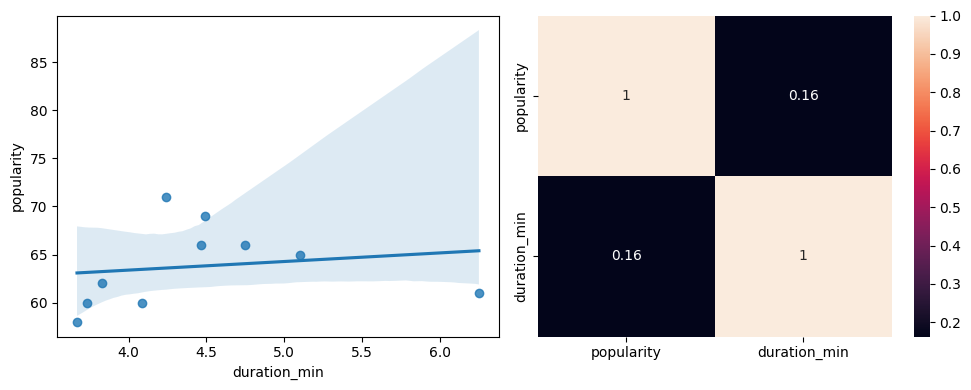

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis= plt.subplots(1,2, figsize=(10,4))

sns.regplot(data=data,x='duration_min',y='popularity',ax=axis[0])
sns.heatmap(data=data.corr(),annot=True,ax=axis[1])
plt.tight_layout()
plt.show()

7 ¿Tiene relación la duración con la popularidad? ¿Podríamos decir que una canción que dure poco tiempo puede ser más popular que otra que dure más? Analízalo graficando un scatter plot y argumenta tu respuesta.

La relación que existe no es significativa, aunque tenemos muy pocos datos para validarlo. Igualmente, de haber una relación, la relación es directa, es decir, a mayor tiempo, mayor popularidad, ya que la correlación es positiva.